2.3.1. Загрузка данных и первичный осмотр

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/S02-hw-dataset.csv')
print(df.info())
print(df.describe())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [42]:
print(df.isna().sum())
mask = df.isna().any()
idx = mask[mask].index
print(df[idx].isna().sum().sum() / len(df[idx]))


user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64
0.04878048780487805


In [29]:
dup = df[df["user_id"].duplicated()]
dup.index

Index([40], dtype='int64')

In [51]:
df_without_dup_nan = df.drop([dup.index[0]]).dropna().reset_index()
print(df_without_dup_nan['user_id'].duplicated().any())

False


In [58]:
mask_age = df_without_dup_nan['age'] > 100
print(mask_age[mask_age])

mask_pur = df_without_dup_nan['purchases'] < 0
print(mask_pur[mask_pur])

mask_rev = df_without_dup_nan['revenue'] < 0
print(mask_pur[mask_pur])

4    True
Name: age, dtype: bool
4    True
Name: purchases, dtype: bool
4    True
Name: purchases, dtype: bool


два nan в столбце age; 
в поле с индексом 4 age больше 100, purchases < 0, revenue < 0


In [59]:
df["country"].value_counts()


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [66]:
print(df.groupby('country')['age'].mean())
print(df.groupby('country')['purchases'].sum())

country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64
country
CN     9
DE    39
FR    51
RU    62
US    37
Name: purchases, dtype: int64


In [ ]:
df['age_group'] = pd.cut(
    df['age'],
    bins = [0, 25, 40, 60, 80, 100],
    labels=['0-25', '25-40', '40-60', '60-80', '80+']
)


In [70]:
print(df.groupby('age_group')['age'].mean())
print(df.groupby('age_group')['purchases'].sum())

age_group
0-25     21.166667
25-40    32.785714
40-60    49.250000
60-80          NaN
80+            NaN
Name: age, dtype: float64
age_group
0-25     62
25-40    74
40-60    48
60-80     0
80+       0
Name: purchases, dtype: int64


C:\Users\aidar\AppData\Local\Temp\ipykernel_12304\1192202583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['age'].mean())
C:\Users\aidar\AppData\Local\Temp\ipykernel_12304\1192202583.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['purchases'].sum())


группа - 25-40, совершают больше покупок, при том, что эта группа находит средней по количеству групп

больше всего покупок делают из региона RU, со средним возрастом 30

Text(0.5, 1.0, 'Распределение цен')

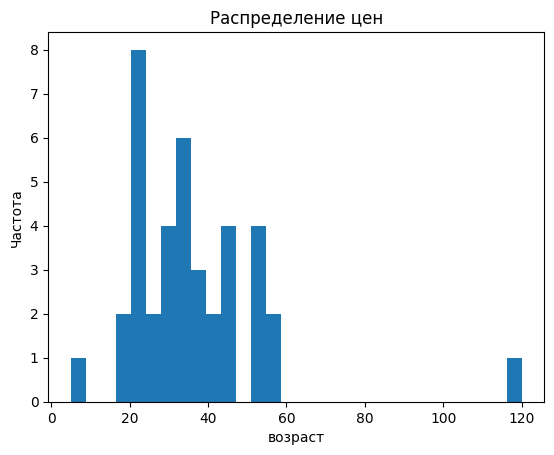

In [74]:
plt.hist(df["age"], bins=30)
plt.xlabel("возраст")
plt.ylabel("Частота")
plt.title("Распределение цен")


Text(0, 0.5, 'покупки')

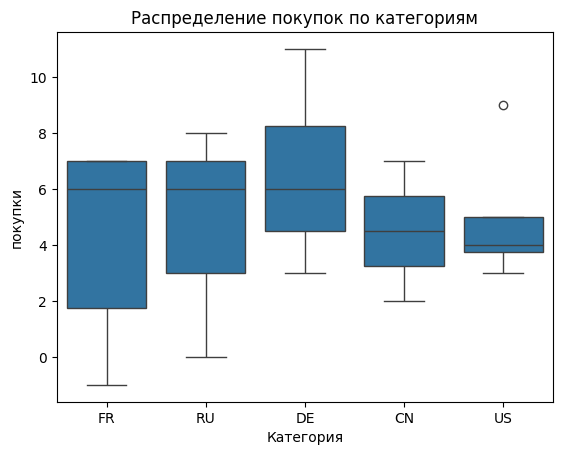

In [80]:
import seaborn as sns
sns.boxplot(x="country", y="purchases", data=df)
plt.title("Распределение покупок по категориям")
plt.xlabel("Категория")
plt.ylabel("покупки")

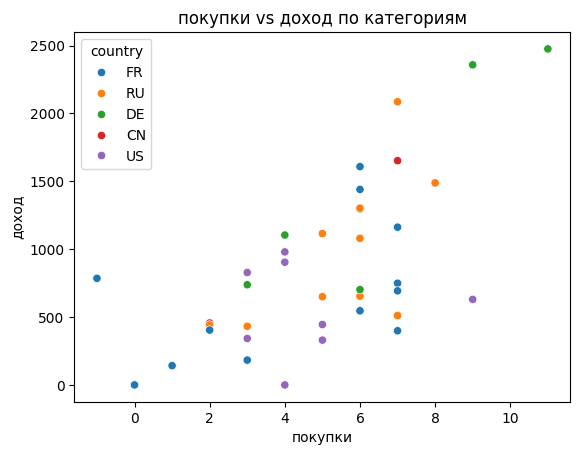

In [82]:
sns.scatterplot(x="purchases", y="revenue", hue="country", data=df)
plt.xlabel("покупки")
plt.ylabel("доход")
plt.title("покупки vs доход по категориям")
plt.savefig('figures/img1.png')
